La solución es

 x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    0.0000e+00    4.3301e+01    0.0000e+00    2.5000e+01 
   2.0000e-01    7.9849e+00    3.6822e+01    4.4242e+00    1.9446e+01 
   4.0000e-01    1.4822e+01    3.1745e+01    7.8480e+00    1.4940e+01 
   6.0000e-01    2.0751e+01    2.7694e+01    1.0451e+01    1.1199e+01 
   8.0000e-01    2.5950e+01    2.4408e+01    1.2365e+01    8.0259e+00 
   1.0000e+00    3.0553e+01    2.1703e+01    1.3690e+01    5.2848e+00 
   1.2000e+00    3.4661e+01    1.9446e+01    1.4501e+01    2.8766e+00 
   1.4000e+00    3.8354e+01    1.7536e+01    1.4858e+01    7.2979e-01 
   1.6000e+00    4.1694e+01    1.5898e+01    1.4807e+01   -1.2073e+00 
   1.8000e+00    4.4727e+01    1.4472e+01    1.4387e+01   -2.9717e+00 
   2.0000e+00    4.7494e+01    1.3214e+01    1.3628e+01   -4.5886e+00 
   2.2000e+00    5.0022e+01    1.2090e+01    1.2560e+01   -6.0750e+00 
   2.4000e+00    5.2337e+01    1.1072e+01    1.1206e+01   -7.4414e+00 
   2.6000e+00    5.4

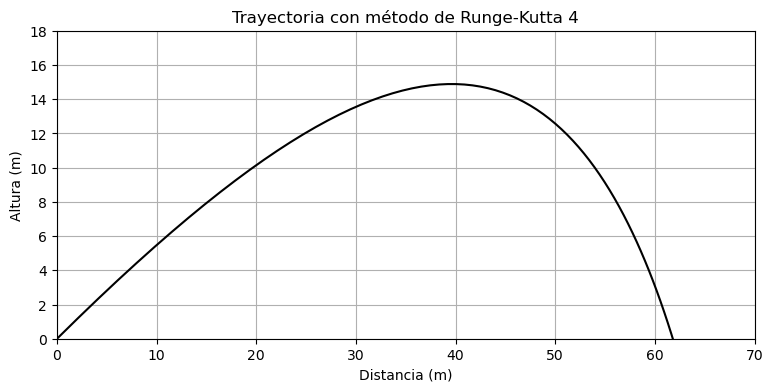

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
# Autores:
# Luis Mario Ruelas Heras
# Jose Angel Ibarra Corvera

# Parametros
theta = np.radians(30) # Angulo de lanzamiento en radianes
m = 0.25 #kg
v0 = 50 #m/s
C_D = 0.03 #kg/(m/s)^(1/2)
g = 9.80665 #m/s^2

# Valores iniciales
x0 = 0 # Posición inicial en  (m)
x1 = v0*cos(theta) # Velocidad inicial en x (m/s)
y0 = 0 # Posición inicial en y (m)
y1 = v0*sin(theta) # Velocidad inicial en y (m/s)

# Metodo de Runge-Kutta
def Run_Kut4(F,x,y,xStop,h):
      def run_kut4(F,x,y,h):
        K0 = h*F(x,y)
        K1 = h*F(x + h/2.0, y + K0/2.0)
        K2 = h*F(x + h/2.0, y + K1/2.0)
        K3 = h*F(x + h, y + K2)
        return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
      X = []
      Y = []
      X.append(x)
      Y.append(y)
      while x < xStop:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
      return np.array(X),np.array(Y)

def imprimeSol(X,Y,frec):
      def imprimeEncabezado(n):
        print("\n x ",end=" ")
        for i in range (n):
          print(" y[",i,"] ",end=" ")
        print()
    
      def imprimeLinea(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range (n):
          print("{:13.4e}".format(y[i]),end=" ")
        print() 
  
      m = len(Y)
      try: n = len(Y[0])
      except TypeError: n = 1
      if frec == 0: frec = m
      imprimeEncabezado(n)
      for i in range(0,m,frec):
       imprimeLinea(X[i],Y[i],n)
      if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)
      


def F(x,y):
      v = sqrt(y[1]**2 + y[3]**2)
      F = np.zeros(4)
      F[0] = y[1]
      F[1] = (-C_D / m) * y[1] * v**(1/2)
      F[2] = y[3]
      F[3] = (-C_D / m) * y[3] * v**(1/2) - g  
      return F

y = np.array([x0, x1, y0, y1])
X,Y=Run_Kut4(F, 0.0, y, 6.0, 0.05)
print("La solución es")
imprimeSol(X, Y, 4)

# Grafica de la trayectoria
plt.figure(figsize = (9, 4))
plt.plot(Y[:, 0], Y[:, 2], color = 'black')
plt.xlim(0, 70)
plt.ylim(0, 18)

plt.xlabel('Distancia (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria con método de Runge-Kutta 4')

plt.grid()
plt.show()